### Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [2]:
# EDA

# os.listdir("F:/projects/rice/image")

In [3]:
len(os.listdir("F:/Project/riceleaf/train"))

3

In [4]:
train_datagen = ImageDataGenerator(zoom_range= 0.1, shear_range= 0.0, horizontal_flip=True ,preprocessing_function= preprocess_input)

val_datagen = ImageDataGenerator(preprocessing_function= preprocess_input)

In [5]:
train = train_datagen.flow_from_directory(directory = 'F:/Project/riceleaf/train', target_size = (256,256), batch_size=32)
val =  val_datagen.flow_from_directory(directory = 'F:/Project/riceleaf/test', target_size = (256,256), batch_size=32)

Found 90 images belonging to 3 classes.
Found 29 images belonging to 3 classes.


In [6]:
t_img, label = train.next()

In [7]:
def plotImage(img_arr, label):
    for im , l in zip(img_arr, label):
        plt.figure(figsize=(6,5))
        plt.subplot(121)
        plt.imshow(im/75)
        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


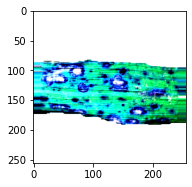

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


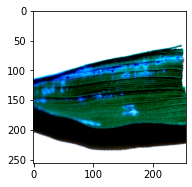

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


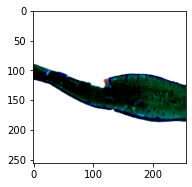

In [8]:
plotImage(t_img[:5], label[:3])

### Building our model

In [9]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [10]:
base_model = VGG19(input_shape=(256,256,3), include_top = False)

In [11]:
for layer in base_model.layers:
    layer.trainable = False

In [12]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [13]:
X = Flatten()(base_model.output)

X = Dense(units = 3, activation = 'softmax')(X)

# Creating our model
model = Model(base_model.input,X)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [15]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

### Early Stopping and Model Check point

In [16]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience = 3, verbose = 1)

# model check point
mc = ModelCheckpoint(filepath = 'best_model.rice', monitor = 'val_accuracy', min_delta = 0.01, patience = 3, verbose = 1, save_best_only = True)

cb = [es, mc]

In [17]:
his = model.fit_generator(train, 
                          steps_per_epoch= 2, 
                          epochs = 10,
                          verbose = 1,
                          callbacks = cb, 
                          validation_data = val,
                          validation_steps= 1)

C:\Users\h\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
2/2 [==============================] - 41s 28s/step - loss: 7.0497 - accuracy: 0.4655 - val_loss: 15.8516 - val_accuracy: 0.5517

Epoch 00001: val_accuracy improved from -inf to 0.55172, saving model to best_model.rice
INFO:tensorflow:Assets written to: best_model.rice\assets
Epoch 2/10
2/2 [==============================] - 41s 29s/step - loss: 4.5959 - accuracy: 0.7069 - val_loss: 7.0070 - val_accuracy: 0.6207

Epoch 00002: val_accuracy improved from 0.55172 to 0.62069, saving model to best_model.rice
INFO:tensorflow:Assets written to: best_model.rice\assets
Epoch 3/10
2/2 [==============================] - 45s 31s/step - loss: 1.1836 - accuracy: 0.9138 - val_loss: 9.0869 - val_accuracy: 0.4828

Epoch 00003: val_accuracy did not improve from 0.62069
Epoch 4/10
2/2 [==============================] - 50s 30s/step - loss: 3.8774 - accuracy: 0.7931 - val_loss: 11.0005 - val_accuracy: 0.5517

Epoch 00004: val_accuracy did not improve from 0.62069
Epoch 5/10
2/2 [===============

In [18]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [19]:
h

{'loss': [7.049744129180908,
  4.595877170562744,
  1.1835508346557617,
  3.8774495124816895,
  1.2106801271438599],
 'accuracy': [0.4655172526836395,
  0.7068965435028076,
  0.9137930870056152,
  0.7931034564971924,
  0.9375],
 'val_loss': [15.851592063903809,
  7.007019996643066,
  9.08692455291748,
  11.000530242919922,
  15.499159812927246],
 'val_accuracy': [0.5517241358757019,
  0.6206896305084229,
  0.48275861144065857,
  0.5517241358757019,
  0.5862069129943848]}

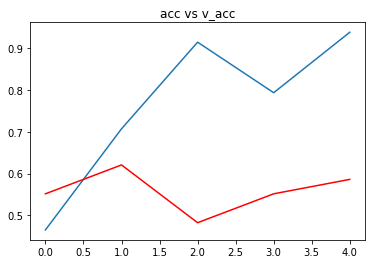

In [20]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = 'red')
plt.title('acc vs v_acc')
plt.show()

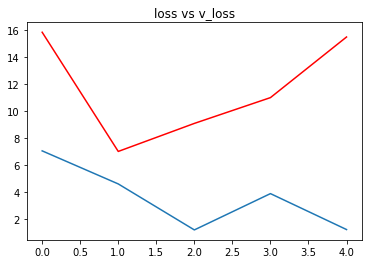

In [21]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = 'red')
plt.title('loss vs v_loss')
plt.show()

In [22]:
# load best model

from keras.models import load_model

model = load_model('F:/Project/riceleaf/best_model.rice')

In [23]:
acc = model.evaluate_generator(val)[1]

print(f'The accuracy of your model is {acc*100} %')

C:\Users\h\anaconda3\lib\site-packages\keras\engine\training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


The accuracy of your model is 62.068963050842285 %


#  The accuracy of your model is 62.0 %